# 1.3

In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")


Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




### 1.3 a)

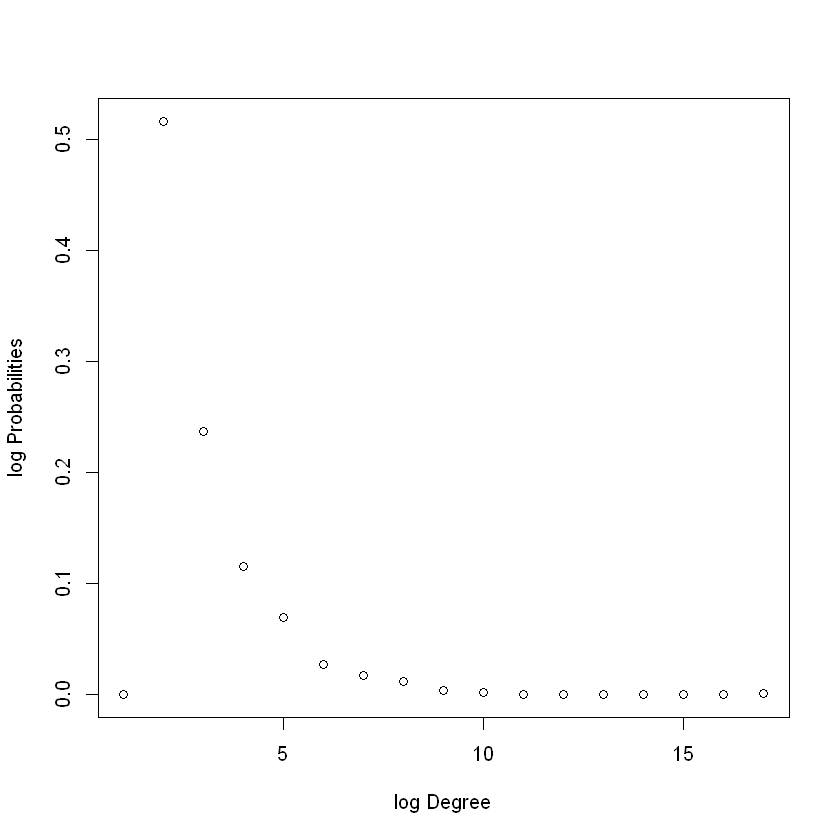

In [2]:
n = 1000
m = 1
alpha = 1
beta = -1
a = c = d = 1
b = 0
g_age <- sample_pa_age(n = n, pa.exp = alpha, aging.exp = beta, m = m, aging.bin = 1000,directed = FALSE, zero.deg.appeal = a, 
                       zero.age.appeal = b,deg.coef = c, age.coef = d)
g_age_deg <- degree.distribution(g_age)
deg <- seq(1, length(g_age_deg))
plot(x = deg, y = g_age_deg, xlab="log Degree", ylab="log Probabilities")


Call:
lm(formula = log_g_age_deg ~ log_deg, na.action = na.exclude)

Coefficients:
(Intercept)      log_deg  
      2.042       -3.240  



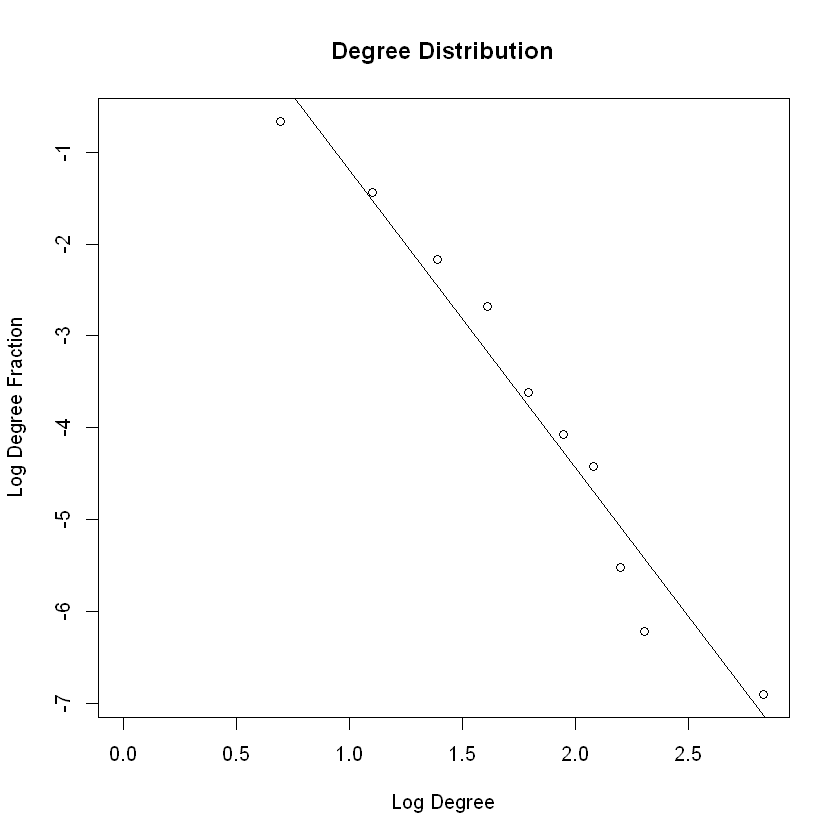

In [3]:
log_g_age_deg <- log(g_age_deg)
log_g_age_deg[which(log_g_age_deg == -Inf)] <- NA

deg <- seq(1, length(g_age_deg))
log_deg <- log(deg)

reg_age <- lm(log_g_age_deg ~ log_deg, na.action = na.exclude)
print(reg_age)

plot(x = log_deg, y = log_g_age_deg,
     main="Degree Distribution",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_age)

### 1.3 b)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
53 43 44 40 43 39 41 36 38 38 37 34 34 30 33 31 32 32 32 31 31 27 27 26 27 26 
27 28 29 30 31 
25 19 19 17 15 

 Modularity is  0.935531627723824

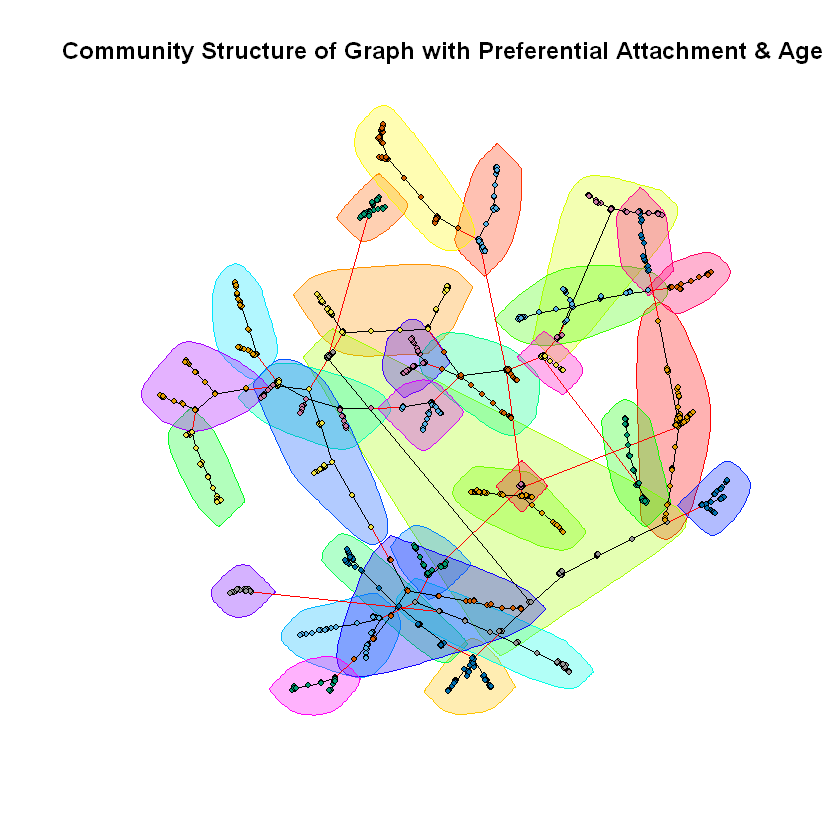

In [4]:
g = sample_pa_age(n = n, pa.exp = alpha, aging.exp = beta, m = m, aging.bin = 1000,directed = FALSE, zero.deg.appeal = a, 
                       zero.age.appeal = b,deg.coef = c, age.coef = d)
g_community = fastgreedy.community(g)
# print(g_community)

# Find sizes of communities
community_sizes = sizes(g_community)
print(community_sizes)

# Find modularity
g_modularity = modularity(g_community)
cat(paste("\n Modularity is ", g_modularity))

# Plot graph with communities
plot(g_community, g, vertex.size=2, vertex.label=NA, main = "Community Structure of Graph with Preferential Attachment & Age")